In [24]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from orcl_fama_french.data_loader import load_ff3, load_ff5, load_oracle_prices

# chemins
notebook_dir = Path.cwd().resolve()
project_root = notebook_dir.parent
data_dir = project_root / "data"
data_dir.mkdir(parents=True, exist_ok=True)  

csv_ff3 = data_dir / "fama_f3_work.csv"
csv_ff5 = data_dir / "ff5_daily_work.csv"

assert csv_ff3.exists(), f"Manque: {csv_ff3}"
assert csv_ff5.exists(), f"Manque: {csv_ff5}"

ff3 = load_ff3(csv_ff3)
ff5 = load_ff5(csv_ff5)
data, data_new = load_oracle_prices(ff3, ff5)

display(data.head()); display(data_new.head())
data.tail(10).to_csv('../outputs/ff3.csv')
data_new.tail(10).to_csv('../outputs/ff5.csv')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/nkeniryanbonny/orcl_fama_french/src/orcl_fama_french/data_loader.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  orcl = yf.download('ORCL', start='2016-01-01', end='2025-07-31', progress=False)
/Users/nkeniryanbonny/orcl_fama_french/src/orcl_fama_french/data_loader.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['orcl_excess_returns'] = data['daily_orcl_returns'] - data['RF']


,Mkt-RF,SMB,HML,RF,orcl_price,daily_orcl_returns,orcl_excess_returns
Date,,,,,,,
2016-01-05,-0.10,-0.26,0.20,0.0,30.764956,-0.307698,-0.307698
2016-01-06,-1.23,0.21,-0.13,0.0,30.920332,0.505044,0.505044
2016-01-07,-1.89,0.23,0.09,0.0,30.247030,-2.177537,-2.177537
2016-01-08,-1.05,0.16,-0.10,0.0,29.910374,-1.113024,-1.113024
2016-01-11,-0.41,-0.56,0.09,0.0,30.160706,0.836940,0.836940


,Mkt-RF,SMB,HML,RMW,CMA,RF,orcl_excess_returns
Date,,,,,,,
2016-01-05,-0.10,-0.25,0.20,-0.14,0.39,0.0,-0.307698
2016-01-06,-1.23,0.24,-0.13,0.16,0.22,0.0,0.505044
2016-01-07,-1.89,0.26,0.09,0.22,0.38,0.0,-2.177537
2016-01-08,-1.05,0.16,-0.10,0.28,-0.06,0.0,-1.113024
2016-01-11,-0.41,-0.51,0.09,0.35,0.35,0.0,0.836940


In [2]:
from orcl_fama_french.factor_models import create_regression_model, cal_exp_ret 
reg = create_regression_model(data, model='FF3')
reg_2 = create_regression_model(data_new, model='FF5')


oracle_expected_returns = cal_exp_ret(reg, data, model='FF3', trading_days=252)
oracle_exp_returns = cal_exp_ret(reg_2, data_new, model='FF5', trading_days=252)

print('\n' + '='*50)
print(reg.params)

print('\n' + '='*50)
print(reg_2.params)

print('\n' + '='*50)
print(f'Expected returns of Oracle is : {oracle_expected_returns*100: .2f}%')

print('\n' + '='*50)
print(f'Expected returns 2 of Oracle is : {oracle_exp_returns*100: .2f}%')


const     0.040391
Mkt-RF    0.941099
SMB      -1.060366
HML      -0.243699
dtype: float64

const     0.038271
Mkt-RF    0.993565
SMB      -1.017206
HML      -0.262248
RMW       0.167355
CMA       0.404432
dtype: float64

Expected returns of Oracle is :  26.43%

Expected returns 2 of Oracle is :  26.27%


In [25]:
# ============================================
# CALCULER LES ROLLING BETAS + ER
# ============================================
from orcl_fama_french.rolling_analysis import cal_rolling_beta

# FF3 avec Rolling ER
print("📊 Calculating FF3 rolling betas and ER...")
data_rolling_ff3 = cal_rolling_beta(data, model='FF3', window=252, min_periods=126)

# FF5 avec Rolling ER
print("📊 Calculating FF5 rolling betas and ER...")
data_rolling_ff5 = cal_rolling_beta(data_new, model='FF5', window=252, min_periods=126)

print("="*80)
print("FF3 ROLLING ANALYSIS - LAST 10 OBSERVATIONS")
print("="*80)

# Colonnes avec Rolling ER
ff3_cols = ['Beta_Mkt-RF', 'Beta_SMB', 'Beta_HML', 'Alpha_FF3', 'R2_FF3', 'Rolling_ER_FF3']
display(data_rolling_ff3[ff3_cols].tail(10))

print("\n" + "="*80)
print("FF5 ROLLING ANALYSIS - LAST 10 OBSERVATIONS")
print("="*80)

ff5_cols = ['Beta_Mkt-RF', 'Beta_SMB', 'Beta_HML', 'Beta_RMW', 'Beta_CMA', 
            'Alpha_FF5', 'R2_FF5', 'Rolling_ER_FF5']
display(data_rolling_ff5[ff5_cols].tail(10))
data_rolling_ff5[ff5_cols].tail(10).to_csv('../outputs/ff5_rolling.csv')
data_rolling_ff3[ff3_cols].tail(10).to_csv('../outputs/ff3_rolling.csv')

📊 Calculating FF3 rolling betas and ER...
📊 Calculating FF5 rolling betas and ER...
FF3 ROLLING ANALYSIS - LAST 10 OBSERVATIONS


,Beta_Mkt-RF,Beta_SMB,Beta_HML,Alpha_FF3,R2_FF3,Rolling_ER_FF3
Date,,,,,,
2025-07-17,1.371876,-0.676673,-1.225629,0.206741,0.447107,0.869316
2025-07-18,1.371694,-0.672511,-1.229846,0.200282,0.446443,0.842025
2025-07-21,1.368299,-0.676486,-1.260115,0.193270,0.444930,0.813193
2025-07-22,1.364275,-0.676172,-1.283444,0.187385,0.445467,0.789094
2025-07-23,1.368975,-0.674346,-1.278225,0.183850,0.446435,0.775208
2025-07-24,1.372344,-0.669934,-1.279096,0.184616,0.446373,0.778383
2025-07-25,1.371331,-0.692047,-1.267930,0.177260,0.447737,0.750042
2025-07-28,1.373564,-0.692407,-1.293186,0.176035,0.445110,0.745650
2025-07-29,1.371571,-0.706835,-1.298023,0.176442,0.444776,0.747768



FF5 ROLLING ANALYSIS - LAST 10 OBSERVATIONS


,Beta_Mkt-RF,Beta_SMB,Beta_HML,Beta_RMW,Beta_CMA,Alpha_FF5,R2_FF5,Rolling_ER_FF5
Date,,,,,,,,
2025-07-17,1.198295,-0.764621,-1.211400,-1.055470,-0.205393,0.194574,0.459795,0.774481
2025-07-18,1.202851,-0.753954,-1.209197,-1.048315,-0.209975,0.189252,0.458845,0.752930
2025-07-21,1.198157,-0.759572,-1.239940,-1.057522,-0.220974,0.182374,0.457655,0.725115
2025-07-22,1.195994,-0.757590,-1.255252,-1.062513,-0.267142,0.175828,0.458530,0.699035
2025-07-23,1.201045,-0.754983,-1.251627,-1.055551,-0.260401,0.173856,0.459240,0.691839
2025-07-24,1.201800,-0.754065,-1.259214,-1.065898,-0.251914,0.177214,0.459486,0.704759
2025-07-25,1.207844,-0.767178,-1.240205,-1.022947,-0.267752,0.170712,0.459974,0.681645
2025-07-28,1.212245,-0.767270,-1.255904,-1.007384,-0.296971,0.169782,0.457283,0.679075
2025-07-29,1.214729,-0.781134,-1.248309,-0.973384,-0.295080,0.172541,0.456230,0.691502


In [4]:
# ============================================
# STATISTIQUES
# ============================================
print("\n" + "="*80)
print("ROLLING ER STATISTICS")
print("="*80)

print(f"\nFF3 Rolling ER:")
print(f"  Mean:    {data_rolling_ff3['Rolling_ER_FF3'].mean()*100:.2f}%")
print(f"  Current: {data_rolling_ff3['Rolling_ER_FF3'].iloc[-1]*100:.2f}%")
print(f"  Min:     {data_rolling_ff3['Rolling_ER_FF3'].min()*100:.2f}%")
print(f"  Max:     {data_rolling_ff3['Rolling_ER_FF3'].max()*100:.2f}%")

print(f"\nFF5 Rolling ER:")
print(f"  Mean:    {data_rolling_ff5['Rolling_ER_FF5'].mean()*100:.2f}%")
print(f"  Current: {data_rolling_ff5['Rolling_ER_FF5'].iloc[-1]*100:.2f}%")
print(f"  Min:     {data_rolling_ff5['Rolling_ER_FF5'].min()*100:.2f}%")
print(f"  Max:     {data_rolling_ff5['Rolling_ER_FF5'].max()*100:.2f}%")


ROLLING ER STATISTICS

FF3 Rolling ER:
  Mean:    22.67%
  Current: 75.50%
  Min:     -11.41%
  Max:     86.93%

FF5 Rolling ER:
  Mean:    20.93%
  Current: 69.09%
  Min:     -10.63%
  Max:     78.10%


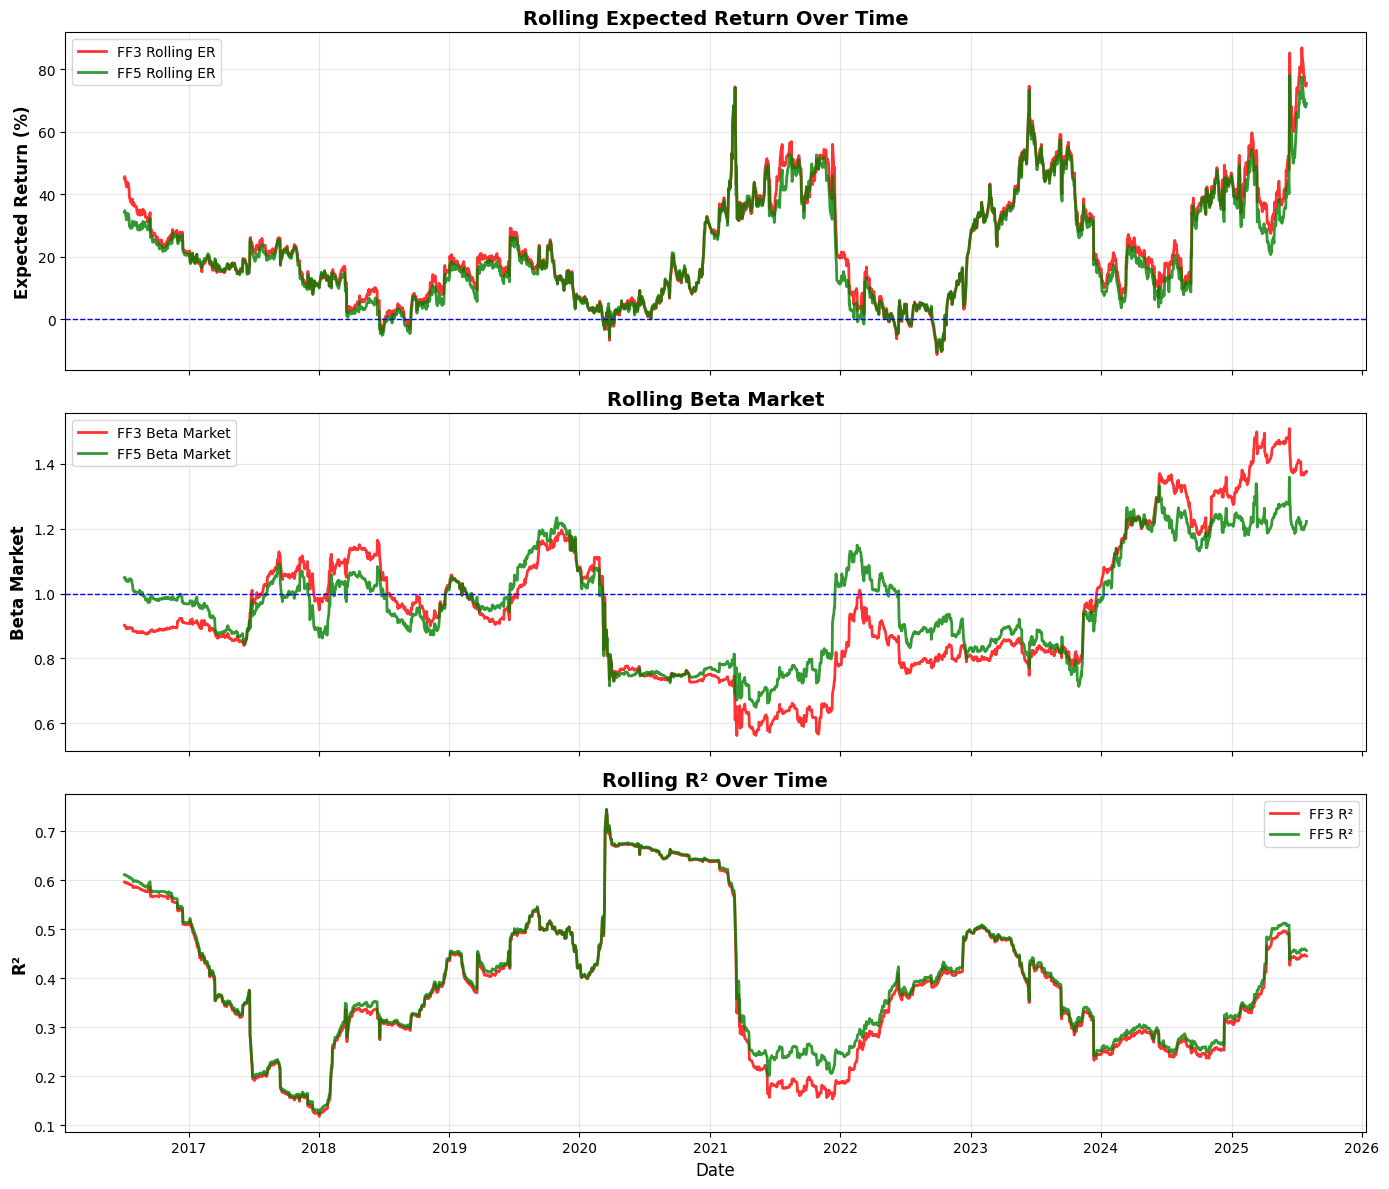

In [26]:
import matplotlib.pyplot as plt

# ============================================
# GRAPHIQUE ROLLING ER
# ============================================
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot 1: Rolling ER
axes[0].plot(data_rolling_ff3.index, data_rolling_ff3['Rolling_ER_FF3']*100, 
             label='FF3 Rolling ER', linewidth=2, color='red', alpha=0.8)
axes[0].plot(data_rolling_ff5.index, data_rolling_ff5['Rolling_ER_FF5']*100, 
             label='FF5 Rolling ER', linewidth=2, color='green', alpha=0.8)
axes[0].axhline(y=0, color='blue', linestyle='--', linewidth=1, alpha=1)
axes[0].set_ylabel('Expected Return (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Rolling Expected Return Over Time', fontsize=14, fontweight='bold')
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Rolling Beta Market
axes[1].plot(data_rolling_ff3.index, data_rolling_ff3['Beta_Mkt-RF'], 
             label='FF3 Beta Market', linewidth=2, color='red', alpha=0.8)
axes[1].plot(data_rolling_ff5.index, data_rolling_ff5['Beta_Mkt-RF'], 
             label='FF5 Beta Market', linewidth=2, color='green', alpha=0.8)
axes[1].axhline(y=1, color='blue', linestyle='--', linewidth=1, alpha=1)
axes[1].set_ylabel('Beta Market', fontsize=12, fontweight='bold')
axes[1].set_title('Rolling Beta Market', fontsize=14, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(True, alpha=0.3)

# Plot 3: Rolling R²
axes[2].plot(data_rolling_ff3.index, data_rolling_ff3['R2_FF3'], 
             label='FF3 R²', linewidth=2, color='red', alpha=0.8)
axes[2].plot(data_rolling_ff5.index, data_rolling_ff5['R2_FF5'], 
             label='FF5 R²', linewidth=2, color='green', alpha=0.8)
axes[2].set_ylabel('R²', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_title('Rolling R² Over Time', fontsize=14, fontweight='bold')
axes[2].legend(loc='best', fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/graph_rolling_er.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
from orcl_fama_french.factor_models import create_regression_model, cal_exp_ret
import pandas as pd
# ============================================
# CALCULER STATIC ER
# ============================================
reg_ff3 = create_regression_model(data, model='FF3')
reg_ff5 = create_regression_model(data_new, model='FF5')

static_er_ff3 = cal_exp_ret(reg_ff3, data, model='FF3')
static_er_ff5 = cal_exp_ret(reg_ff5, data_new, model='FF5')

# ============================================
# COMPARAISON TABLE
# ============================================
comparison = pd.DataFrame({
    'Metric': [
        'Static ER (%)',
        'Rolling ER - Mean (%)',
        'Rolling ER - Current (%)',
        'Difference Static-Current (%)'
    ],
    'FF3': [
        static_er_ff3 * 100,
        data_rolling_ff3['Rolling_ER_FF3'].mean() * 100,
        data_rolling_ff3['Rolling_ER_FF3'].iloc[-1] * 100,
        (static_er_ff3 - data_rolling_ff3['Rolling_ER_FF3'].iloc[-1]) * 100 
    ],
    'FF5': [
        static_er_ff5 * 100,
        data_rolling_ff5['Rolling_ER_FF5'].mean() * 100,
        data_rolling_ff5['Rolling_ER_FF5'].iloc[-1] * 100,
        (static_er_ff5 - data_rolling_ff5['Rolling_ER_FF5'].iloc[-1]) * 100 
    ]
})

print("\n" + "="*80)
print("📊 STATIC ER vs ROLLING ER COMPARISON")
print("="*80 + "\n")
display(comparison.style\
    .format({'FF3': '{: .2f}', 'FF5': '{: .2f}'})\
    .background_gradient(cmap='RdYlGn', subset=['FF3', 'FF5'])\
    .set_properties(**{'text-align': 'center'}))
comparison.to_csv('../outputs/static_er_rolling_er.csv')
comparison.to_html('../outputs/static_er_rolling_er.html')



📊 STATIC ER vs ROLLING ER COMPARISON



,Metric,FF3,FF5
0,Static ER (%),26.43,26.27
1,Rolling ER - Mean (%),22.67,20.93
2,Rolling ER - Current (%),75.50,69.09
3,Difference Static-Current (%),-49.07,-42.82


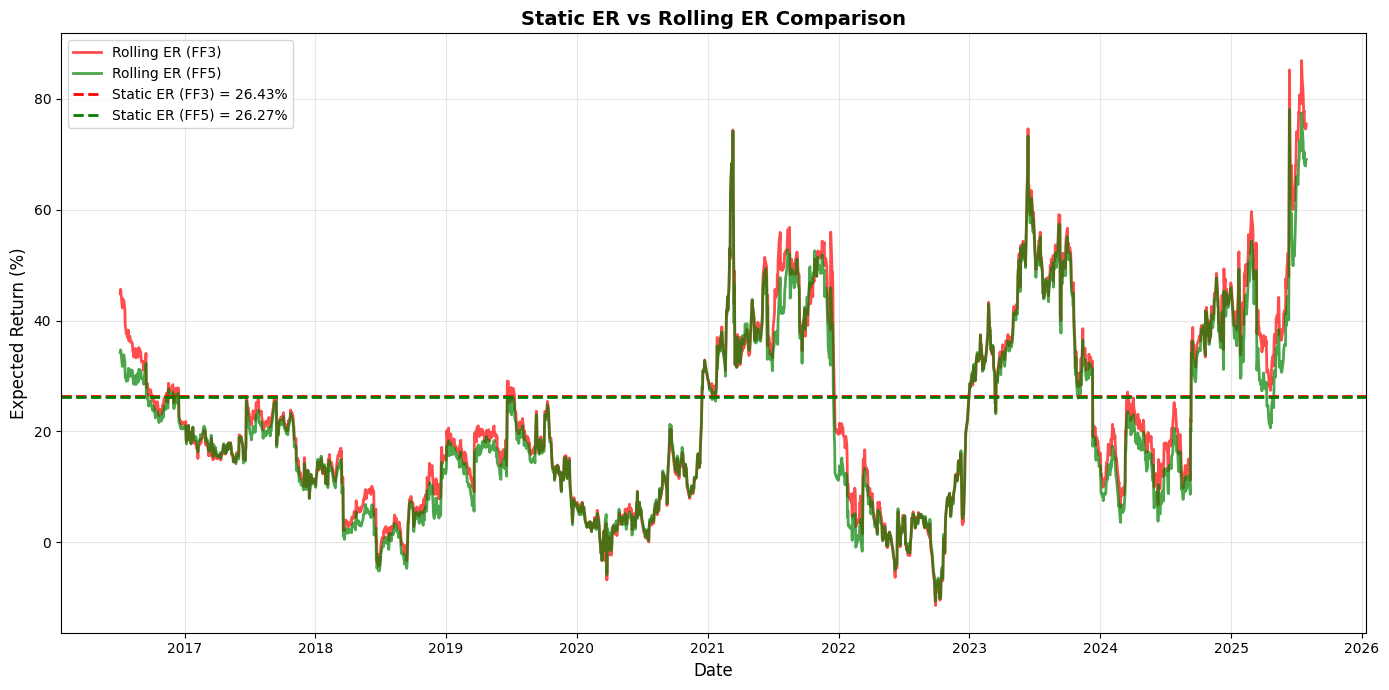

In [28]:
# ============================================
# GRAPHIQUE COMPARAISON
# ============================================
fig, ax = plt.subplots(figsize=(14, 7))

# Rolling ER
ax.plot(data_rolling_ff3.index, data_rolling_ff3['Rolling_ER_FF3']*100, 
        label='Rolling ER (FF3)', linewidth=2, color='red', alpha=0.7)
ax.plot(data_rolling_ff5.index, data_rolling_ff5['Rolling_ER_FF5']*100, 
        label='Rolling ER (FF5)', linewidth=2, color='green', alpha=0.7)

# Static ER (lignes horizontales)
ax.axhline(y=static_er_ff3*100, color='red', linestyle='--', 
           linewidth=2, label=f'Static ER (FF3) = {static_er_ff3*100:.2f}%')
ax.axhline(y=static_er_ff5*100, color='green', linestyle='--', 
           linewidth=2, label=f'Static ER (FF5) = {static_er_ff5*100:.2f}%')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Expected Return (%)', fontsize=12)
ax.set_title('Static ER vs Rolling ER Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/static_er_rolling_er.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# ============================================
# TABLEAU RÉCAPITULATIF FINAL
# ============================================

summary = pd.DataFrame({
    'Metric': [
        'Static ER (%)',
        'Rolling ER - Mean (%)',
        'Rolling ER - Std (%)',
        'Rolling ER - Current (%)',
        'Beta Market - Mean',
        'Beta Market - Current',
        'Alpha - Mean (% daily)',
        'Alpha - Current (% daily)',
        'R² - Mean',
        'R² - Current'
    ],
    'FF3': [
        static_er_ff3 * 100,
        data_rolling_ff3['Rolling_ER_FF3'].mean() * 100,
        data_rolling_ff3['Rolling_ER_FF3'].std() * 100,
        data_rolling_ff3['Rolling_ER_FF3'].iloc[-1] * 100,
        data_rolling_ff3['Beta_Mkt-RF'].mean(),
        data_rolling_ff3['Beta_Mkt-RF'].iloc[-1],
        data_rolling_ff3['Alpha_FF3'].mean(),
        data_rolling_ff3['Alpha_FF3'].iloc[-1],
        data_rolling_ff3['R2_FF3'].mean(),
        data_rolling_ff3['R2_FF3'].iloc[-1]
    ],
    'FF5': [
        static_er_ff5 * 100,
        data_rolling_ff5['Rolling_ER_FF5'].mean() * 100,
        data_rolling_ff5['Rolling_ER_FF5'].std() * 100,
        data_rolling_ff5['Rolling_ER_FF5'].iloc[-1] * 100,
        data_rolling_ff5['Beta_Mkt-RF'].mean(),
        data_rolling_ff5['Beta_Mkt-RF'].iloc[-1],
        data_rolling_ff5['Alpha_FF5'].mean(),
        data_rolling_ff5['Alpha_FF5'].iloc[-1],
        data_rolling_ff5['R2_FF5'].mean(),
        data_rolling_ff5['R2_FF5'].iloc[-1]
    ]
})

print("\n" + "="*80)
print("📊 COMPLETE SUMMARY TABLE")
print("="*80 + "\n")

display(summary.style\
    .format({'FF3': '{:.4f}', 'FF5': '{:.4f}'})\
    .background_gradient(cmap='RdYlGn', subset=['FF3', 'FF5'])\
    .set_properties(**{'text-align': 'center'}))

summary.to_csv('../outputs/summary.csv')
summary.to_html('../outputs/summary.html')


📊 COMPLETE SUMMARY TABLE



,Metric,FF3,FF5
0,Static ER (%),26.4286,26.2711
1,Rolling ER - Mean (%),22.6730,20.9260
2,Rolling ER - Std (%),16.9945,16.2329
3,Rolling ER - Current (%),75.4999,69.0926
4,Beta Market - Mean,0.9552,0.9662
5,Beta Market - Current,1.3760,1.2220
6,Alpha - Mean (% daily),0.0238,0.0173
7,Alpha - Current (% daily),0.1782,0.1722
8,R² - Mean,0.3831,0.3948
9,R² - Current,0.4449,0.4561


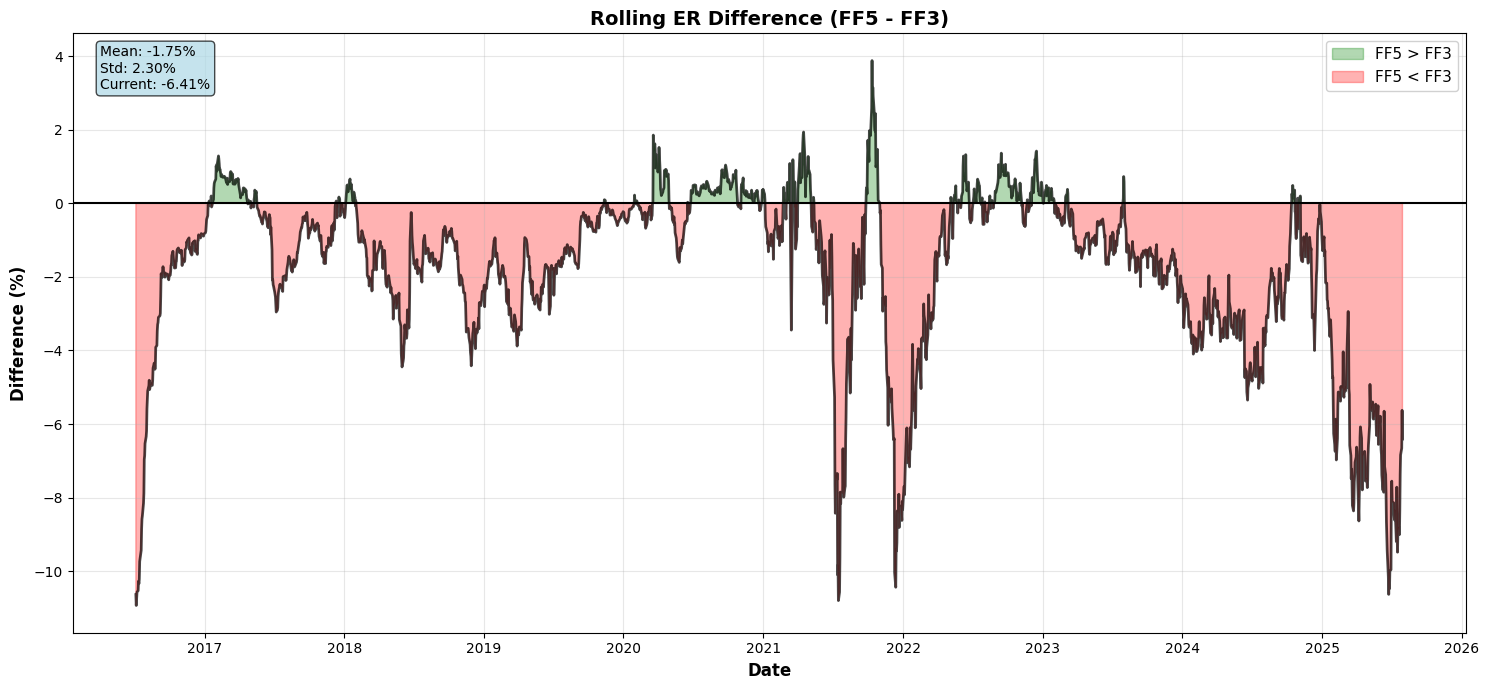

In [29]:
import matplotlib.pyplot as plt

# ============================================
# GRAPHIQUE: DIFFÉRENCE FF5 - FF3
# ============================================

# Calculer la différence
er_diff = (data_rolling_ff5['Rolling_ER_FF5'] - data_rolling_ff3['Rolling_ER_FF3']) * 100

# Créer le graphique
fig, ax = plt.subplots(figsize=(15, 7))

# Remplissage coloré selon positif/négatif
ax.fill_between(data_rolling_ff5.index, er_diff, 0, 
                 where=(er_diff > 0), color='green', alpha=0.3, label='FF5 > FF3')
ax.fill_between(data_rolling_ff5.index, er_diff, 0, 
                 where=(er_diff <= 0), color='red', alpha=0.3, label='FF5 < FF3')
ax.plot(data_rolling_ff5.index, er_diff, linewidth=2, color='black', alpha=0.7)

ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.set_ylabel('Difference (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_title('Rolling ER Difference (FF5 - FF3)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3)

# Stats
mean_diff = er_diff.mean()
current_diff = er_diff.iloc[-1]
stats_text = f"Mean: {mean_diff:.2f}%\nStd: {er_diff.std():.2f}%\nCurrent: {current_diff:.2f}%"
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.tight_layout()
plt.savefig('../outputs/rolling_er_dif.png', dpi=300, bbox_inches='tight')
plt.show()



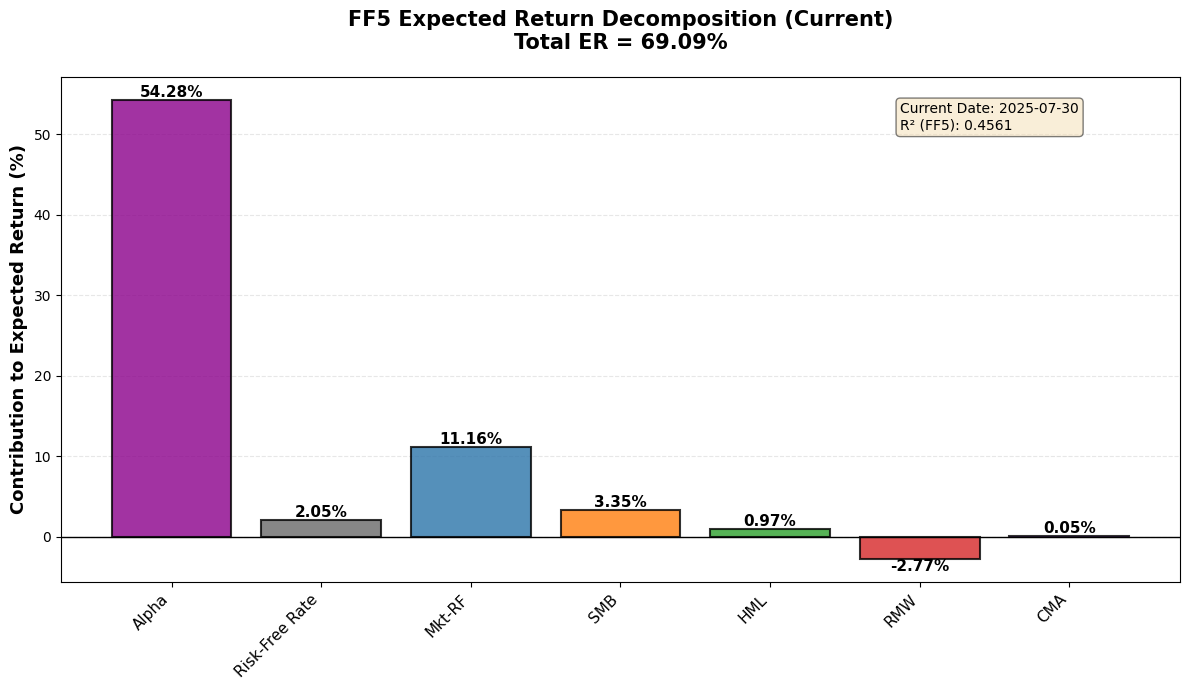

In [30]:
from orcl_fama_french.visualisation import plot_er_decomposition_ff5

# Générer le graphique
fig = plot_er_decomposition_ff5(data_rolling_ff5, data_new)
plt.savefig('../outputs/ff5_exp_ret_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()